In [204]:
from time import strptime

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def covert_row_values_to_string(row):
    return row.map(lambda price: int(price))

data = pd.read_excel("data/rollingsales_bronx.xlsx", skiprows=4)

#validation
data['apartment_number'] = data['apartment_number'].replace(np.nan, "")
data['easement'] = data['easement'].replace(np.nan, "")
data.dropna()
data = data[data['sale_price'] != 0]
data['sale_price'] = data['sale_price'].map(lambda price: int(price))


In [205]:
# get avarage sale price at each neighborhood
def covert_row_values_to_int(row):
    return row.map(lambda price: int(price))

data_grouped_by_neighborhood = data[['neighborhood', 'sale_price']]

data_grouped_by_neighborhood['sale_price'] = covert_row_values_to_int(data_grouped_by_neighborhood['sale_price'])

data_grouped_by_neighborhood = data_grouped_by_neighborhood.groupby(by=["neighborhood"], as_index=False).mean()

data_grouped_by_neighborhood = data_grouped_by_neighborhood.sort_values(['sale_price'])
data_grouped_by_neighborhood['sale_price'] = data_grouped_by_neighborhood['sale_price'].map(lambda price: format(price, '.0f'))
data_grouped_by_neighborhood['sale_price'] = covert_row_values_to_int(data_grouped_by_neighborhood['sale_price'])
data_grouped_by_neighborhood

/var/folders/jy/h3839gc51t5fzwf7gq70nxgw0000gn/T/ipykernel_7170/2322078019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_grouped_by_neighborhood['sale_price'] = covert_row_values_to_int(data_grouped_by_neighborhood['sale_price'])


,neighborhood,sale_price
23,PARKCHESTER,375761
26,PELHAM PARKWAY SOUTH,458675
7,CITY ISLAND,499694
27,RIVERDALE,511418
8,CITY ISLAND-PELHAM STRIP,519998
5,BRONXDALE,677737
30,THROGS NECK,681460
35,WOODLAWN,696223
9,COUNTRY CLUB,730053
19,MORRIS PARK/VAN NEST,749789


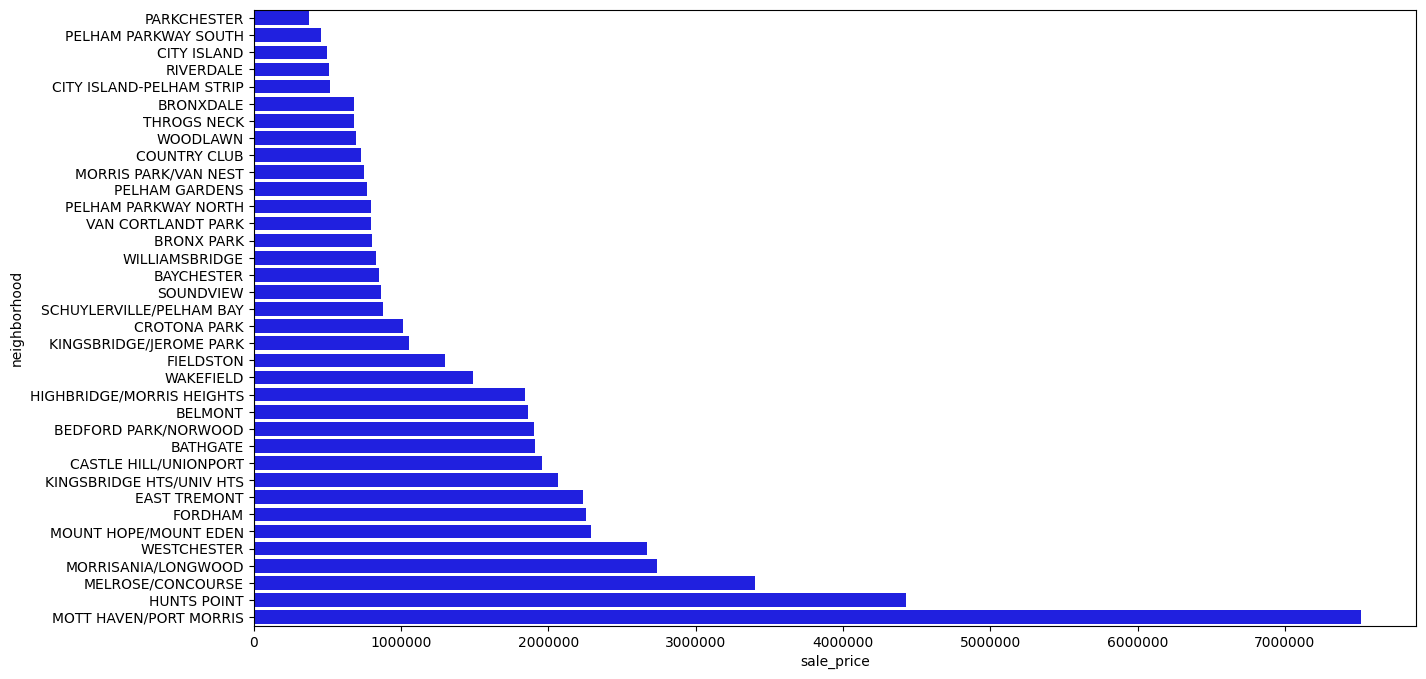

In [227]:
plt.figure(figsize=(15,8))
g = sns.barplot(x="sale_price", y="neighborhood", data=data_grouped_by_neighborhood,
            label="Total", color="b")
plt.ticklabel_format(style='plain', axis='x')

/var/folders/jy/h3839gc51t5fzwf7gq70nxgw0000gn/T/ipykernel_7170/805190462.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_neighborhood_and_months = data.groupby(['neighborhood', 'month'], as_index=False).mean()


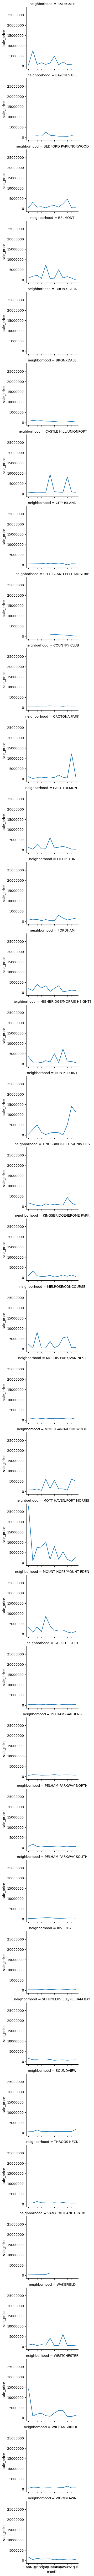

In [216]:
data['sale_date'] = pd.to_datetime(data['sale_date'],format='%m/%d/%y')
data['month'] = data['sale_date'].map(lambda date: date.strftime("%b"))
data_grouped_by_neighborhood_and_months = data.groupby(['neighborhood', 'month'], as_index=False).mean()

neighborhood_graph = sns.FacetGrid(data_grouped_by_neighborhood_and_months, row="neighborhood")
neighborhood_graph.map_dataframe(sns.lineplot, x="month", y="sale_price")
plt.ticklabel_format(style='plain', axis='y')




In [207]:
data_summed = pd.DataFrame({'avg_selling_price': [1], 'avg_land_square_feet': [1], 'avg_year_built': [1], 'avg_gross_square_feet': [1]})
data_summed['avg_selling_price'] = format(data['sale_price'].mean(), '.0f')
data_summed['avg_land_square_feet'] = format(data['land_square_feet'].mean(), '.0f')
data_summed['avg_gross_square_feet'] = format(data['gross_square_feet'].mean(), '.0f')
data_summed['avg_year_built'] = format(data['year_built'].mean(), '.0f')
data_summed



,avg_selling_price,avg_land_square_feet,avg_year_built,avg_gross_square_feet
0,1353671,15367,1945,7802


/var/folders/jy/h3839gc51t5fzwf7gq70nxgw0000gn/T/ipykernel_7170/1960375628.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped_by_year = data.groupby(['year_built'], as_index=False).mean()


([<matplotlib.axis.XTick at 0x7fe83262b970>,
 [Text(0, 0, '1883'),
  Text(10, 0, '1906'),
  Text(20, 0, '1916'),
  Text(30, 0, '1927'),
  Text(40, 0, '1937'),
  Text(50, 0, '1949'),
  Text(60, 0, '1959'),
  Text(70, 0, '1969'),
  Text(80, 0, '1980'),
  Text(90, 0, '1991'),
  Text(100, 0, '2001'),
  Text(110, 0, '2011'),
  Text(120, 0, '2021')])

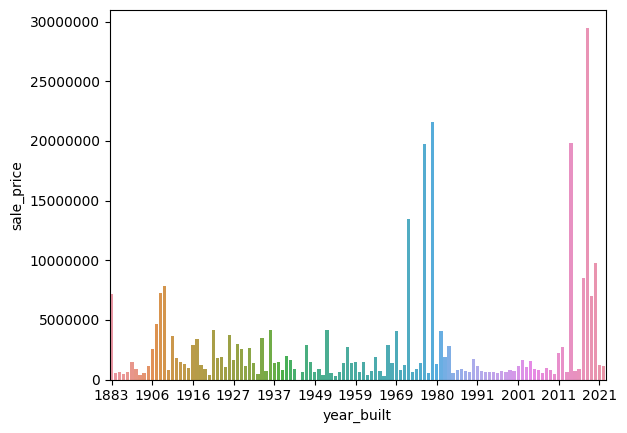

In [210]:
data_grouped_by_year = data.groupby(['year_built'], as_index=False).mean()
data_grouped_by_year['year_built'] = covert_row_values_to_int(data_grouped_by_year['year_built'])
sns.barplot(data=data_grouped_by_year, x="year_built", y="sale_price")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0, len(data_grouped_by_year['year_built']), 10), data_grouped_by_year['year_built'][::10])

